### https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
### https://cloud.tencent.com/developer/article/1492314
https://www.machinelearningplus.com/machine-learning/evaluation-metrics-classification-models-r
### 多分类 ROC
+ https://blog.csdn.net/u011047955/article/details/87259052

### KS Test
+ https://www.cnblogs.com/arkenstone/p/5496761.html

### ROC, KS曲线, Lift 曲线, PR 曲线
+ https://zhuanlan.zhihu.com/p/39435695

### 在什么情况下用什么指标评测

In [1]:
!which python

/Users/sunhongchao/anaconda3/envs/tf_base/bin/python


# MNIST Experiment

In [2]:
# load MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("Mnist_data/", one_hot=True)

# start tensorflow interactiveSession
import tensorflow as tf
sess = tf.InteractiveSession()

# weight initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

# convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
# pooling
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') # 步长为 2*2, 每次卷积，图像面积都变为原来的四分只一

# Create the model
# placeholder
x = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])
# variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x,W) + b)

# first convolutinal layer
w_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
print('h_pool1', h_pool1.get_shape()) # (?, 14, 14, 32)

# second convolutional layer
w_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
print('h_pool2', h_pool2.get_shape()) # (?, 7, 7, 64)

# densely connected layer
w_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

# dropout
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# readout layer
w_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

# train and evaluate the model
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdagradOptimizer(1e-4).minimize(cross_entropy)

# accuracy
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess.run(tf.initialize_all_variables())
for i in range(600):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_:batch[1], keep_prob:1.0})
        print("step %d, train accuracy %g" %(i, train_accuracy))
    train_step.run(feed_dict={x:batch[0], y_:batch[1], keep_prob:0.5})

print("test acc %g" % accuracy.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob:1.0}))

/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sunhongchao/anaconda3/envs/tf_base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sunhongchao/anacon

# Accuracy
+ 二分类 不平衡的情况下是无效的


In [3]:
# micro 

# marco

# Confusion matrix

(?, 10)
[7, 2, 1, 0, 4, 1, 4, 4, 9, 7]
[[3.78128164e-03 8.85556947e-05 1.01571775e-03 2.81977584e-03
  1.89619698e-03 1.94355345e-03 4.40627191e-04 9.83175099e-01
  9.50881047e-04 3.88839166e-03]
 [1.05994157e-02 5.81113901e-03 7.42356420e-01 3.83227542e-02
  1.84438867e-03 7.56021217e-02 3.09969112e-02 9.31655930e-04
  9.28749144e-02 6.60354155e-04]
 [9.79673641e-05 9.64866161e-01 5.46567189e-03 5.07176947e-03
  1.56514230e-03 3.72449961e-03 4.25339025e-03 9.07023065e-03
  4.29456774e-03 1.59068592e-03]
 [6.76391363e-01 9.30621027e-05 1.73856467e-02 1.86805092e-02
  1.78360695e-03 1.38783576e-02 2.39356533e-01 3.92092206e-03
  2.48315632e-02 3.67840892e-03]
 [1.64063938e-03 7.72355725e-06 8.29916506e-04 1.18125579e-03
  6.11400187e-01 3.01039289e-03 3.65023240e-02 1.11043185e-03
  5.73946862e-04 3.43743265e-01]
 [4.27592277e-05 9.88503754e-01 1.49197469e-03 2.49713450e-03
  9.02851811e-04 4.93353349e-04 9.56630684e-04 3.01231164e-03
  1.20648951e-03 8.92669545e-04]
 [7.82444794e-03 7.

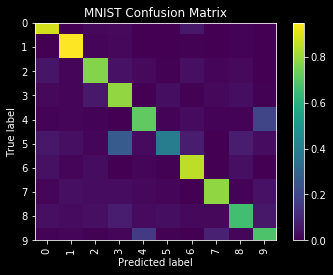

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

def convert_to_one_hot(y, C):
    return np.eye(C)[y.reshape(-1)].T
    
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

print(y_conv.get_shape())

outputs_all = y_conv.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob:1.0})


# y = np.array([1,2,3,4])
# convert_to_one_hot(y,5)
outputs = [ np.argmax(item) for item in outputs_all]
grounds = [ np.argmax(item) for item in mnist.test.labels ]

print(outputs[:10])
print(outputs_all[:10])
print(grounds[:10])

# confusion matrix


cm = sklearn.metrics.confusion_matrix(
    grounds,   # array, Gound true (correct) target values
    outputs,  # array, Estimated targets as returned by a classifier
    labels=None,  # array, List of labels to index the matrix.
    sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
)

plot_confusion_matrix(cm, list(range(10)), "MNIST Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()


# p, r, f1

In [5]:

## p
print("precision")
from sklearn.metrics import precision_score
print(precision_score(grounds, outputs, average='macro'))  
print(precision_score(grounds, outputs, average='micro'))  
print(precision_score(grounds, outputs, average='weighted'))
print(precision_score(grounds, outputs, average=None))

## r
print("recall")
from sklearn.metrics import recall_score
print(recall_score(grounds, outputs, average='macro'))  
print(recall_score(grounds, outputs, average='micro'))  
print(recall_score(grounds, outputs, average='weighted'))
print(recall_score(grounds, outputs, average=None))

## pr 曲线

## f1
print("f1")
from sklearn.metrics import f1_score
print(f1_score(grounds, outputs, average='macro'))  
print(f1_score(grounds, outputs, average='micro'))  
print(f1_score(grounds, outputs, average='weighted'))
print(f1_score(grounds, outputs, average=None))

## classification_report
from sklearn.metrics import classification_report
classification_report(grounds, outputs, target_names=[ str(item) for item in list(range(10))])



precision
0.7552856070929941
0.755
0.7567334309904702
[0.7831216  0.86126704 0.77539062 0.63549921 0.71298174 0.75635593
 0.7831094  0.83384615 0.74104046 0.6702439 ]
recall
0.7488030759702087
0.755
0.755
[0.88061224 0.94625551 0.76937984 0.79405941 0.71588595 0.40022422
 0.85177453 0.79085603 0.65811088 0.68087215]
f1
0.7447441101770683
0.755
0.7491393740912761
[0.82901057 0.90176322 0.77237354 0.70598592 0.71443089 0.52346041
 0.816      0.81178233 0.697118   0.67551622]


'              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.83       980\n           1       0.86      0.95      0.90      1135\n           2       0.78      0.77      0.77      1032\n           3       0.64      0.79      0.71      1010\n           4       0.71      0.72      0.71       982\n           5       0.76      0.40      0.52       892\n           6       0.78      0.85      0.82       958\n           7       0.83      0.79      0.81      1028\n           8       0.74      0.66      0.70       974\n           9       0.67      0.68      0.68      1009\n\n    accuracy                           0.76     10000\n   macro avg       0.76      0.75      0.74     10000\nweighted avg       0.76      0.76      0.75     10000\n'

# other metrics from confusion matrix
+ sensitivity = recall = A/(A + C)
+ specificity = B/(B+D)
+ detection rate = A/(A + B + C + D)
+ Prevalence = (A + C)/(A + B + C + D)
+ Detection Prevalence = (A + B)/(A + B + C + D)
+ Balance Accuracy = [sensitivity + specificity]/2
+ Precision = A/(A+B)
+ Recall = A/(A+C)
+ F1 score = 2 * Precision * Recall /(Precision + Recall)
+ Youden's J Index = sensitivity + specificity - 1


In [6]:
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# specificity = tn / (tn+fp)

# Cohen's Kappa
+ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html
+ This function computes Cohen’s kappa, a score that expresses the level of agreement between two annotators on a classification problem
+ 一致性检测，多个模型或者分析方法在预测结果上是否具有一致性
+ 只返回一个数，没有具体类别的信息
+ $k = \frac{p_o - p_e}{1 - p_e}$ 
+ $p_e$ 每一类争取分类的样本数，除以总样本数
+ 假设每一类的真实样本个数分别为$a_1,a_2,...,a_C$，而预测出来的每一类的样本个数分别为$b_1,b_2,...,b_C$
+ $ p_o = \frac{a_1 * b_1 + a_2 * b_2 + ... + a_c * b_c}{ n * n} $


![20191023191600.png](https://blog-picture-bed.oss-cn-beijing.aliyuncs.com/blog/upload/20191023191600.png)

In [7]:
print(grounds[:10])
print(outputs[:10])
print(sklearn.metrics.cohen_kappa_score(grounds, outputs, labels=None, weights=None, sample_weight=None))

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[7, 2, 1, 0, 4, 1, 4, 4, 9, 7]
0.7274954630775261


# Kolmogorov Smirnov

- http://www.physics.csbsju.edu/stats/KS-test.html
- https://www.cnblogs.com/arkenstone/p/5496761.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
- https://zhuanlan.zhihu.com/p/42656285
    - ks 的各种实现
    - crosstab
    - roc_curve
    - ks_2samp
- 在sklearn库中的roc_curve函数计算roc和auc时，计算过程中已经得到好坏人的累积概率分布，同时我们利用sklearn.metrics.roc_curve来计算ks值

- Kolmogorov-Smirnov是比较一个频率分布f(x)与理论分布g(x)或者两个观测值分布的检验方法

- If the p-value is greater than the significance level (say 5%), then we cannot reject the hypothesis that the data come from the given distribution.


In [8]:
from scipy.stats import kstest
import numpy as np
 
x = np.random.normal(0,1,1000)
test_stat = kstest(x, 'norm')
print(test_stat)

KstestResult(statistic=0.029227075316796386, pvalue=0.3553227047990168)


In [9]:
from scipy.stats import ks_2samp
beta=np.random.beta(7,5,1000)
norm=np.random.normal(0,1,1000)
print(ks_2samp(beta,norm))

Ks_2sampResult(statistic=0.606, pvalue=2.2259579332703023e-171)


In [10]:
from scipy.stats import ks_2samp
print(ks_2samp(grounds,outputs))

Ks_2sampResult(statistic=0.0482, pvalue=1.614066761277084e-10)


# 多分类 ROC

(10000, 10)
(10000, 10)
10000
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
10000
[3.78128164e-03 1.05994157e-02 9.79673641e-05 6.76391363e-01
 1.64063938e-03 4.27592277e-05 7.82444794e-03 2.23558542e-04
 7.11539760e-02 1.44801065e-02]
i 0 thresholds 430
10000
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
10000
[8.8555695e-05 5.8111390e-03 9.6486616e-01 9.3062103e-05 7.7235572e-06
 9.8850375e-01 7.5693424e-05 2.1455593e-03 1.3515020e-02 1.8089110e-03]
i 1 thresholds 252
10000
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
10000
[0.00101572 0.7423564  0.00546567 0.01738565 0.00082992 0.00149197
 0.00800422 0.00414098 0.03992968 0.00188302]
i 2 thresholds 670
10000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10000
[0.00281978 0.03832275 0.00507177 0.01868051 0.00118126 0.00249713
 0.01440963 0.05392079 0.033397   0.00188397]
i 3 thresholds 812
10000
[0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
10000
[0.0018962  0.00184439 0.00156514 0.00178361 0.6114002  0.00090285
 0.436328   0.35192993 0.16766252 0.08557677]
i 4 thresholds 772
10000
[0. 0. 0. 0. 0. 0. 

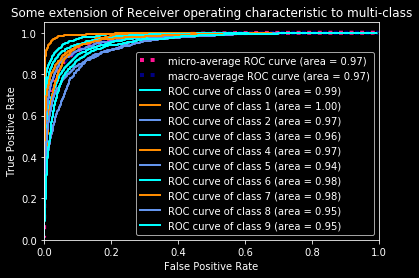

In [39]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_class = 10
x_train, x_test, y_train, y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
y_one_hot = label_binarize(y_test, np.arange(n_class))  #装换成类似二进制的编码
y_score = outputs_all

# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

print(y_test.shape)
print(y_score.shape)

# class
for i in range(n_class):
    print(len(y_test[:, i]))
    print(y_test[:, i][:10])
    print(len(y_score[:, i]))
    print(y_score[:, i][:10])
    fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])
    print("i", i, "thresholds", len(thresholds))

# micio
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# marco
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_class
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
                                             

In [55]:
import numpy as np
from sklearn import metrics
y = np.array([1, 2, 1, 2 ])
scores = np.array([0.2, 0.8, 0.4, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print(fpr,'\n',tpr,'\n',thresholds)

[0. 0. 1.] 
 [0. 1. 1.] 
 [1.8 0.8 0.2]


In [59]:
a = [0.8, 0.8, 0.4, 0.2]
print(np.diff(a))
print(np.where(np.diff(a))[0])

[ 0.  -0.4 -0.2]
[1 2]


In [53]:
list_1 = [0, 1, 0, 1]
print(np.where(list_1))
print(np.where(list_1)[0])
print(np.argsort(list_1))

(array([1, 3]),)
[1 3]
[0 2 1 3]


In [46]:
print(np.r_[list_1, 1])

[0 0 1 1 1]


# Gini Coefficient
- Gini Coefficient = (2 * AUROC) - 1

# Concordance and Discordance

# Somers-D statistic
+ Somers D = (#Concordant Pairs - #Discordant Pairs - #Ties) / Total Pairs

# Gain and Lift Charts
- https://www.cnblogs.com/bicoffee/p/4390614.html

# Log Loss

# Root Mean Squared Error

![](https://www.machinelearningplus.com/wp-content/uploads/2017/09/Confusion-Matrix.png)

![metrics.png](https://blog-picture-bed.oss-cn-beijing.aliyuncs.com/blog/upload/metrics.png)